In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import tensorflow as tf
from tensorflow import keras

Verify the versions of tf and keras

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
tf.__version__

'2.1.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

For more infor: https://github.com/zalandoresearch/fashion-mnist

In [5]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # sorting into test and train set

You can get more details with dir and help

In [7]:
help(fashion_mnist)

Help on package tensorflow_core.python.keras.api._v2.keras.datasets.fashion_mnist in tensorflow_core.python.keras.api._v2.keras.datasets:

NAME
    tensorflow_core.python.keras.api._v2.keras.datasets.fashion_mnist - Fashion-MNIST dataset.

PACKAGE CONTENTS


FILE
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py




In [8]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [9]:
X_train_full.shape # checking the shape of the training set

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [10]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [12]:
y_train[0]

4

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

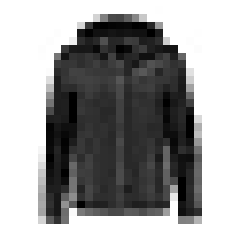

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

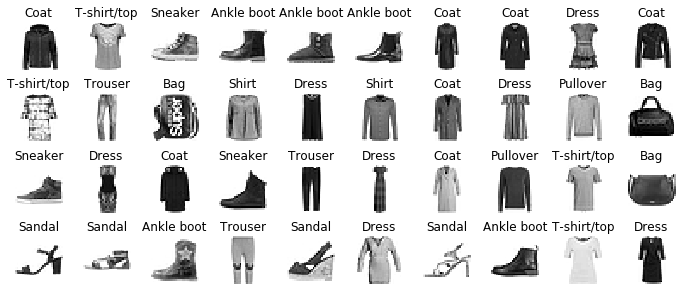

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
# Creating a classification MLP with Keras' Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten layer
model.add(keras.layers.Dense(300, activation="relu")) # dense layer 1
model.add(keras.layers.Dense(100, activation="relu")) # dense layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # softmax layer

### Understanding Cross-Entropy

Cross entropy is a loss function used for classification

In [23]:
import numpy as np
from numpy import log
def my_cross_entropy(actual, predicted):
    return -np.dot(actual, log(predicted))

def binary_cross_entropy(actual, predicted):
    return my_cross_entropy([actual, 1-actual], [predicted, 1-predicted])

def mse_error(actual, predicted):
    vector1 = np.array([actual, 1-actual])
    vector2 = np.array([predicted, 1-predicted])
    error = np.sum(np.square(vector1 - vector2))
    return error

In [24]:
print (binary_cross_entropy(1, 0.00001))
print (mse_error(1, 0.00001))

11.512925464970229
1.9999600002000002


In [26]:
prob=np.arange(0.1, 0.9, 0.1)

prob=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2,0.1, 0.01, 0.001, 0.0001, 0.000001]
bin_ce=[binary_cross_entropy(1., x) for x in prob]
print (bin_ce)
mse_arr=[mse_error(1., x) for x in prob]
print (mse_arr)

[0.10536051565782628, 0.2231435513142097, 0.35667494393873245, 0.5108256237659907, 0.6931471805599453, 0.916290731874155, 1.2039728043259361, 1.6094379124341003, 2.3025850929940455, 4.605170185988091, 6.907755278982137, 9.210340371976182, 13.815510557964274]
[0.01999999999999999, 0.07999999999999996, 0.18000000000000005, 0.32000000000000006, 0.5, 0.72, 0.9799999999999999, 1.2800000000000002, 1.62, 1.9602, 1.996002, 1.9996000200000001, 1.9999960000019998]


### Create Model

**Why do we need clear_session?**

It is useful when you're creating multiple models in succession, such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in the thousands) to the graph. EVentually models will become slower and slower to train, and you may also run out of memory. Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.

In [30]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [31]:
# Creating a classification MLP with Keras' Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten layer
model.add(keras.layers.Dense(300, activation="relu")) # dense layer 1
model.add(keras.layers.Dense(100, activation="relu")) # dense layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # softmax layer

In [32]:
model.layers # viewing the layers

In [33]:
model.summary() # viewing the summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


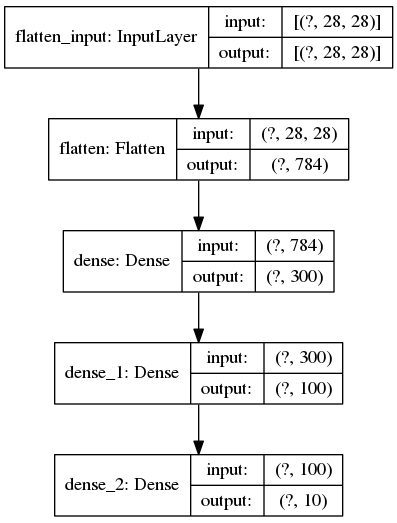

In [34]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [36]:
hidden1 = model.layers[1] # first layer
hidden1.name

'dense'

In [37]:
model.get_layer(hidden1.name) is hidden1 # checking if the layer is hidden

True

In [38]:
weights, biases = hidden1.get_weights() # getting the weights and biases

In [39]:
weights # checking the weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [40]:
weights.shape

(784, 300)

In [41]:
biases # checking the biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [42]:
biases.shape

(300,)

In [43]:
#sgd = keras.optimizers.SGD(learning_rate=0.001)
# Compiling the model we created

model.compile(loss="sparse_categorical_crossentropy",
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              optimizer="sgd",
             metrics=["accuracy"]
             # metrics=[keras.metrics.sparse_categorical_accuracy, ]
             )


This is equivalent to:
```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [44]:
history = model.fit(X_train, y_train, epochs=30, batch_size=20,
                    validation_data=(X_valid, y_valid)) # fitting the model to training data

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 152us/sample - loss: 0.6519 - accuracy: 0.7814 - val_loss: 0.4816 - val_accuracy: 0.8406
Epoch 2/30
55000/55000 [==============================] - 8s 147us/sample - loss: 0.4559 - accuracy: 0.8409 - val_loss: 0.4255 - val_accuracy: 0.8544
Epoch 3/30
55000/55000 [==============================] - 8s 146us/sample - loss: 0.4138 - accuracy: 0.8556 - val_loss: 0.4057 - val_accuracy: 0.8578
Epoch 4/30
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3852 - accuracy: 0.8629 - val_loss: 0.3868 - val_accuracy: 0.8648
Epoch 5/30
55000/55000 [==============================] - 8s 148us/sample - loss: 0.3635 - accuracy: 0.8700 - val_loss: 0.3583 - val_accuracy: 0.8720
Epoch 6/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.3474 - accuracy: 0.8752 - val_loss: 0.3533 - val_accuracy: 0.8728
Epoch 7/30
55000/55000 [===========================

In [46]:
history.params # getting the param history


{'batch_size': 20,
 'epochs': 30,
 'steps': 2750,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [47]:
print(history.epoch) # epoch history

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [48]:
history.history.keys() # printing the history keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Plotting the mean training loss and accuracy measured over each epoch
# and the mean validation loss and accuracy measured at the end of each epoch

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [ ]:
model.evaluate(X_test, y_test) # Evaluating the model

In [ ]:
class_names

In [ ]:
# predicting first 3 elements

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
plt.imshow(X_new[2])

In [ ]:
np.argmax(y_proba.round(2), axis=1)

In [ ]:
# predicting the class of these 3 elements

y_pred = model.predict_classes(X_new)
y_pred

In [ ]:
np.array(class_names)[y_pred] # getting the class names of the predicted elements

In [ ]:
y_new = y_test[:3] # evaluating the prediction by matching with y_test
y_new

In [ ]:
# Plotting the predicted elements

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()